<a href="https://colab.research.google.com/github/dhruv-s1/Machinelearningmodels/blob/Supervised/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas for data manipulation
import pandas as pd

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing numpy for numerical operations
import numpy as np

import seaborn as sns
# Importing k-Nearest Neighbors Classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Reading the loan dataset into a pandas DataFrame
df = pd.read_csv("loan.csv")

# Printing the first five rows of the DataFrame
df.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
# Print number of data points in each class
print(df['loan_status'].value_counts())

# Dictionary to input the different numbers for different classes
label_encode = {"loan_status": {"Approved": 0, "Denied": 1}}

# Use .replace to change the different classes into numbers
df.replace(label_encode, inplace=True)

# Print number of data points in each class to check if the classes have changed to numbers
print(df['loan_status'].value_counts())


loan_status
Approved    45
Denied      16
Name: count, dtype: int64
loan_status
0    45
1    16
Name: count, dtype: int64


/tmp/ipython-input-1155689037.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(label_encode, inplace=True)


In [ ]:
# Read the loan dataset into a pandas DataFrame
df_loan = pd.read_csv("loan.csv")

# Define the column names for the loan dataset
names = ["age", "gender", "occupation", "education_level", "marital_status", "income", "credit_score", "loan_status"]

# Rename the columns of the DataFrame
df_loan.columns = names

# Apply one-hot encoding to the 'loan_status' column
df_loan_encoded = pd.get_dummies(df_loan, columns=['loan_status'], prefix='loan_status')

# Print the first few rows of the encoded loan dataset
print(df_loan_encoded.head())


   age  gender  occupation education_level marital_status  income  \
0   32    Male    Engineer      Bachelor's        Married   85000   
1   45  Female     Teacher        Master's         Single   62000   
2   28    Male     Student     High School         Single   25000   
3   51  Female     Manager      Bachelor's        Married  105000   
4   36    Male  Accountant      Bachelor's        Married   75000   

   credit_score  loan_status_Approved  loan_status_Denied  
0           720                  True               False  
1           680                  True               False  
2           590                 False                True  
3           780                  True               False  
4           710                  True               False  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Selecting features and target variable
X = df_loan_encoded[['age', 'income']]
y = df_loan_encoded['loan_status_Approved']  # Assuming 'loan_status_Approved' is the encoded column for loan approval

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a KNN classifier with default parameters (n_neighbors=5)
knn_classifier = KNeighborsClassifier()

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting loan status for the test data
y_pred = knn_classifier.predict(X_test)

# Print the first few predictions
print(y_pred[:5])


[ True False  True  True  True]


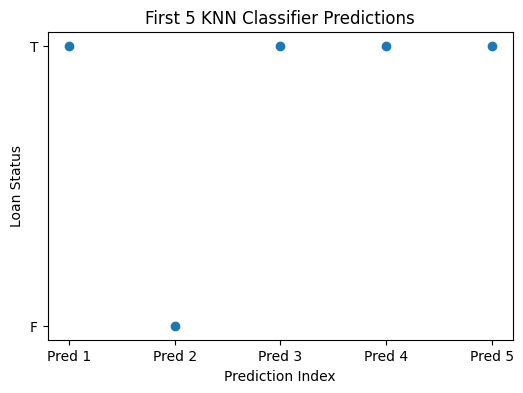

In [ ]:
# Select the first 5 predictions
first_5_predictions = y_pred[:5]

# Map True to 1 and False to 0 for plotting
mapped_predictions = [1 if p else 0 for p in first_5_predictions]

# Create a simple scatter plot
plt.figure(figsize=(6, 4))
plt.scatter([0,1,2,3,4],mapped_predictions)
plt.xticks([0,1,2,3,4], ['Pred 1', 'Pred 2', 'Pred 3', 'Pred 4', 'Pred 5'])
plt.yticks([0, 1], ['F', 'T'])
plt.xlabel('Prediction Index')
plt.ylabel('Loan Status')
plt.title('First 5 KNN Classifier Predictions')
plt.show()